<a href="https://colab.research.google.com/github/JorgeAccardi/auscultacion-presa/blob/main/Analisis_de_Datos_PG_PE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Cambia el nombre de archivo y la hoja si es necesario
archivo = "/content/PCG-PE_20250608.csv"
df = pd.read_csv(archivo)
#df = pd.read_excel(archivo)

# Muestra las primeras filas
print(df.head())

# Muestra las columnas y tipos de datos
print(df.dtypes)

# Muestra cantidad de datos y nulos
print(df.info())
print(df.isnull().sum())

        FECHA MARGEN     PIEZOMETRO  LECTURA_CUERDA_VIBRANTE  \
0  12/11/2020     MD  MD-PCG-PE1-B1                  9040.22   
1  16/11/2020     MD  MD-PCG-PE1-B1                  9037.01   
2  19/11/2020     MD  MD-PCG-PE1-B1                  9039.08   
3  22/11/2020     MD  MD-PCG-PE1-B1                  9043.59   
4  05/12/2020     MD  MD-PCG-PE1-B1                  9037.50   

   TEMPERATURA_(°C)  MCA_1_(FACTOR_G)  MCA_2_(FACTOR_G_Y_K) COTA_NF  \
0              10.9         -0.262286             -0.109630  SIN NF   
1              10.9         -0.173754             -0.021098  SIN NF   
2              10.9         -0.230845             -0.078189  SIN NF   
3              10.9         -0.355230             -0.202574  SIN NF   
4              10.8         -0.187268             -0.033249  SIN NF   

   PRECIPITACIONES_(MM)  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
FECHA                       obje

In [9]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

def cargar_archivo_pc():
    from google.colab import files
    uploaded = files.upload()
    filename = next(iter(uploaded))
    print(f"Archivo '{filename}' subido.")
    return filename

# Widget para elegir tipo de archivo (solo Excel y CSV)
tipo = widgets.Dropdown(
    options=[('Excel', 'xlsx'), ('CSV', 'csv')],
    description='Tipo:',
    disabled=False,
)

# Botón para cargar
boton = widgets.Button(description="Cargar Datos")
salida = widgets.Output()

def cargar_datos(b):
    with salida:
        clear_output()
        tipo_arch = tipo.value
        archivo = cargar_archivo_pc()
        if not archivo:
            print("No se seleccionó archivo.")
            return

        print(f"\nCargando archivo: {archivo}")
        try:
            if tipo_arch == "xlsx":
                df = pd.read_excel(archivo)
            elif tipo_arch == "csv":
                df = pd.read_csv(archivo)
            else:
                print("Tipo de archivo no soportado.")
                return
        except Exception as e:
            print(f"Error al cargar el archivo: {e}")
            return

        print(f"Archivo '{archivo}' cargado correctamente.")
        display(df.head())
        print("\nInformación general del DataFrame:")
        display(df.info())
        print("\nCantidad de valores nulos por columna:")
        display(df.isnull().sum())
        globals()['df'] = df

boton.on_click(cargar_datos)
display(widgets.VBox([tipo, boton, salida]))

Estadísticas descriptivas generales:



,FECHA,MARGEN,PIEZOMETRO,LECTURA_CUERDA_VIBRANTE,TEMPERATURA_(°C),MCA_1_(FACTOR_G),MCA_2_(FACTOR_G_Y_K),COTA_NF,PRECIPITACIONES_(MM)
count,2089,1893,2089,2085.000000,2085.000000,2085.000000,2085.000000,2085,1099.000000
unique,171,2,32,NaN,NaN,NaN,NaN,868,NaN
top,07/06/2023,MD,MD-PCG-PE1-B1,NaN,NaN,NaN,NaN,SIN NF,NaN
freq,32,1237,102,NaN,NaN,NaN,NaN,906,NaN
mean,NaN,NaN,NaN,8763.830393,10.994868,4.859748,4.872114,NaN,6.296178
std,NaN,NaN,NaN,304.777236,0.970079,8.916701,8.892760,NaN,7.937055
min,NaN,NaN,NaN,7756.760000,8.700000,-0.962012,-0.969946,NaN,0.000000
25%,NaN,NaN,NaN,8650.320000,10.200000,-0.264486,-0.215322,NaN,0.300000
50%,NaN,NaN,NaN,8877.300000,11.300000,0.194956,0.178738,NaN,2.500000
75%,NaN,NaN,NaN,8949.150000,11.600000,7.379479,7.426491,NaN,9.800000



Primeras y últimas fechas del registro:
2020-11-12 00:00:00 → 2023-11-20 00:00:00

Cantidad de registros por año y mes:


año   mes
2020  11       6
      12       2
2021  1        2
      2        8
      3       18
      4       25
      5       33
      6       35
      7       40
      8       79
      9       59
      10      60
      11      80
      12      40
2022  1       54
      2       61
      3       79
      4       80
      5       90
      6       93
      7       97
      8       79
      9        2
      10       2
2023  2        8
      3      116
      4      124
      5       61
      6       94
      7      124
      8       93
      9      124
      10     126
      11      95
dtype: int64

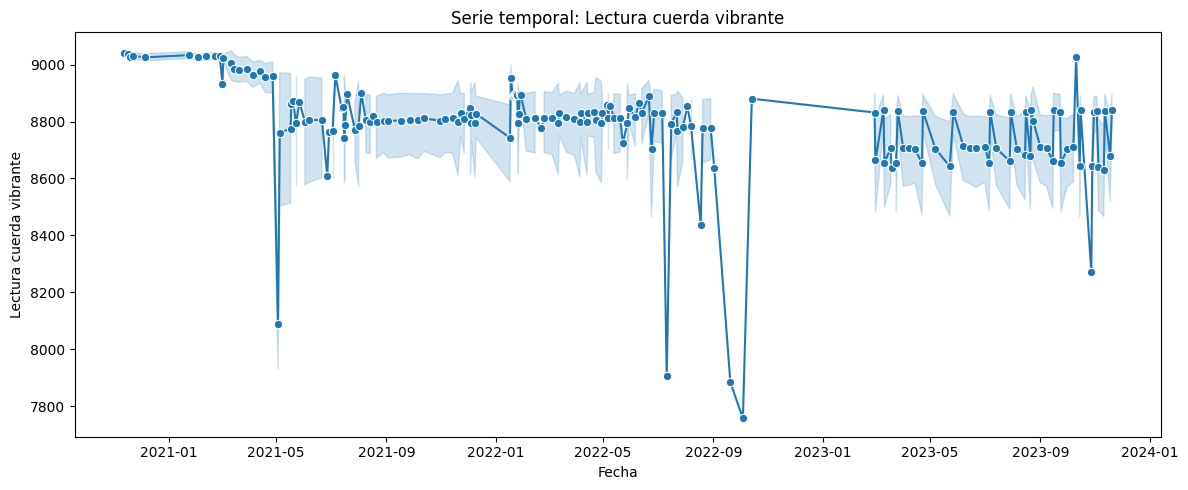

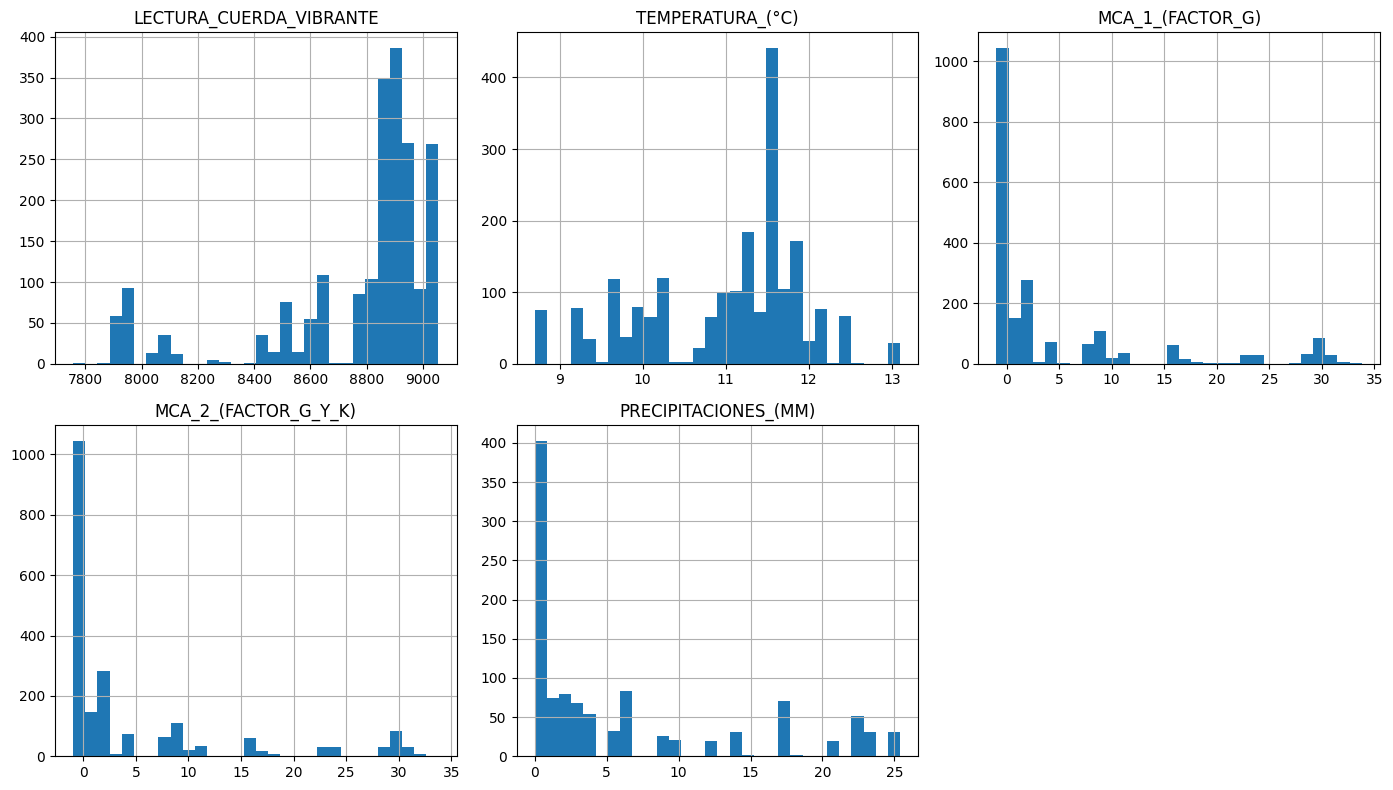

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Estadísticas descriptivas ---
print("Estadísticas descriptivas generales:\n")
display(df.describe(include='all'))

# --- Distribución de fechas ---
print("\nPrimeras y últimas fechas del registro:")
df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True, errors='coerce')
print(df['FECHA'].min(), "→", df['FECHA'].max())

# --- Conteo de datos por año/mes ---
df['año'] = df['FECHA'].dt.year
df['mes'] = df['FECHA'].dt.month
conteo_mes = df.groupby(['año', 'mes']).size()
print("\nCantidad de registros por año y mes:")
display(conteo_mes)

# --- Gráfico de la serie temporal principal ---
plt.figure(figsize=(12,5))
sns.lineplot(x='FECHA', y='LECTURA_CUERDA_VIBRANTE', data=df, marker='o')
plt.title('Serie temporal: Lectura cuerda vibrante')
plt.xlabel('Fecha')
plt.ylabel('Lectura cuerda vibrante')
plt.tight_layout()
plt.show()

# --- Histogramas básicos ---
num_cols = ['LECTURA_CUERDA_VIBRANTE', 'TEMPERATURA_(°C)', 'MCA_1_(FACTOR_G)', 'MCA_2_(FACTOR_G_Y_K)', 'PRECIPITACIONES_(MM)']
df[num_cols].hist(bins=30, figsize=(14,8), layout=(2,3))
plt.tight_layout()
plt.show()